In [184]:
# Important necessary libraries, tools and frameworks 
import pandas as pd
import numpy as np 
from sklearn import preprocessing 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import metrics 

# Tools for visualization 
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Gets directory in order to obtain location of dataset 
import os 
working_directory = os.getcwd() 

In [185]:
# Import dataset 
df = pd.read_csv(working_directory + "/waterchem.csv")

# Fill NaN values 
df = df.fillna(0)

# Rename a couple of columns
df = df.rename(columns={"Color.PtCo": "color_ptCo", "ANC.ueq.L": "ANC_ueq_L"})

df

,PERMANENT_ID,lake.name,date,year,month,SO4_minus2,NO3_minus,CL,Fluor,ANC_ueq_L,...,Sodium,Potassium,NH4_plus,AL_TD.ug.L,AL_TM.ug.L,AL_OM.ug.L,AL_IM.ug.L,pH,color_ptCo,conduct.uS.cm
0,131843856,Big Moose,1994-01-05,1994,1,5.850,1.137,0.360,0.075,11.340,...,0.560,0.330,0.045,274.0,191.0,59.0,132.0,5.42,20.0,22.5
1,131843856,Big Moose,1994-02-02,1994,2,6.440,1.450,0.400,0.066,8.110,...,0.650,0.300,0.086,309.0,144.0,49.0,95.0,5.23,20.0,20.3
2,131843856,Big Moose,1994-03-03,1994,3,6.320,1.822,0.420,0.082,-0.280,...,0.650,0.330,0.059,381.0,192.0,86.0,106.0,5.20,20.0,25.5
3,131843856,Big Moose,1994-04-06,1994,4,5.980,1.968,0.410,0.082,8.070,...,0.640,0.320,0.061,365.0,254.0,176.0,78.0,5.28,25.0,25.3
4,131843856,Big Moose,1994-05-04,1994,5,5.110,2.007,0.360,0.069,0.470,...,0.480,0.310,0.045,356.0,301.0,71.0,230.0,5.12,25.0,22.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6277,131844009,Windfall,2012-08-09,2012,8,2.902,0.771,0.222,0.066,145.856,...,0.326,0.204,0.025,30.0,44.0,69.0,0.0,7.43,15.0,26.4
6278,131844009,Windfall,2012-09-06,2012,9,2.942,0.317,0.236,0.066,149.802,...,0.347,0.239,0.020,19.0,29.0,28.0,1.0,7.33,15.0,26.2
6279,131844009,Windfall,2012-10-15,2012,10,3.081,0.404,0.210,0.061,140.466,...,0.343,0.219,-0.004,34.0,40.0,42.0,0.0,7.26,25.0,25.9
6280,131844009,Windfall,2012-11-05,2012,11,3.206,0.705,0.236,0.055,133.766,...,0.300,0.225,-0.005,47.0,38.0,37.0,1.0,7.31,20.0,26.1


In [186]:
# Set features and target variable
# "SO4_minus2","NO3_minus","CL","Fluor","ANC.ueq.L","DIC","DOC","SiO2","Calcium","Mg","Sodium","Potassium","NH4_plus","AL_TD.ug.L","AL_TM.ug.L","AL_OM.ug.L","AL_IM.ug.L","pH","Color.PtCo","conduct.uS.cm"
# feature_cols = ['SO4_minus2','NO3_minus','Calcium', 'Color.PtCo', 'NH4_plus']

feature_cols = ['color_ptCo', 'pH']
X = df[feature_cols]
y = df.NO3_minus

print(X)
print(y)

# Split data into training set and testing set (8:2 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



      color_ptCo    pH
0           20.0  5.42
1           20.0  5.23
2           20.0  5.20
3           25.0  5.28
4           25.0  5.12
...          ...   ...
6277        15.0  7.43
6278        15.0  7.33
6279        25.0  7.26
6280        20.0  7.31
6281        30.0  7.10

[6282 rows x 2 columns]
0       1.137
1       1.450
2       1.822
3       1.968
4       2.007
        ...  
6277    0.771
6278    0.317
6279    0.404
6280    0.705
6281    1.131
Name: NO3_minus, Length: 6282, dtype: float64


In [187]:
# Create model -- Random Forest
rf = RandomForestRegressor(max_depth=2, random_state=42)
rf.fit(X_train, y_train)

# Make predictions 
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

In [188]:
# Model Performance 


# Mean Squared Error 
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)


# Root MSE
rf_train_rmse = mean_squared_error(y_train, y_rf_train_pred, squared=False)
rf_test_rmse = mean_squared_error(y_test, y_rf_test_pred, squared=False)


# Mean Absolute Error
rf_train_mae = mean_absolute_error(y_train, y_rf_train_pred)
rf_test_mae = mean_absolute_error(y_test, y_rf_test_pred)


# Print out results
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_test_mse, rf_train_rmse, rf_test_rmse, rf_train_mae, rf_test_mae]).transpose()
rf_results.columns = ['Method', 'Training MSE','Test MSE', 'Training RMSE', 'Test RMSE', 'Training MAE', 'Test MAE']

print(rf_results)



          Method Training MSE  Test MSE Training RMSE Test RMSE Training MAE  \
0  Random Forest     0.613225  0.634356      0.783087  0.796465     0.572574   

   Test MAE  
0  0.579216  


In [189]:
# Use the model
color = input("Enter a value for the color of the lake, on the platnium cobalt scale.")
pH = float(input("Enter a value for the pH of the lake.")) 

# Define data instance
Xnew = [[color, pH]]

# Make a prediction
ynew = rf.predict(Xnew)
nitrate = ynew # Unit for nitrate is mg/L

# Show the inputs and predicted outputs
print("nitrate=%s" % (nitrate) + "mg/L")

# Incorporating pH and nitrate uptake data
# Idea: Implement search algorithm

print("Potential macrophytes that could be introduced into the ecosystem include: ")
print(" ")

# Matching pH values to species
if 7.2 <= pH <= 8.5: 
    print("Daphnia (Water fleas)")
if 5.8 <= pH <= 6.0: 
    print("Eicchornia crassipes (Water hyacinth)")
if 6.0 <= pH <= 8.0: 
    print("Salvinia auriculata (Giant salvinia)")
if 6.5 <= pH <= 9.5: 
    print("Lemnoidieae (Duckweeds)")
if 6.5 <= pH <= 7.5: 
    print("Pistia Stratiotes (Water lettuce)")
if pH == 6: 
    print("Typa latifolia (Broadleaf cattail)")
if 5.5 <= pH <= 7.5: 
    print("Phrragmites austrails (Common reed)")
if 5.5 <= pH <= 6.0: 
    print("Zizania latifolia (Manchurian wild)")
if pH == 8.5:
    print("Hydrilla verticillata (Waterthymes)")
if 6.0 <= pH <= 6.5: 
    print("Chlorophytum comosum (Spider plant)")
    print("Dracaena sanderriana (Lucky bamboo)")
if 7.0 <= pH <= 8.5: 
    print("Myriophyllum verticillatum (Whorled water-milfoil)")
if 4.8 <= pH <= 7.7:  
    print("Alternanthera philoxeroides (Alligator weed)")
if 5.0 <= pH <= 7.0: 
    print("Ipomoea aquatica (Water spinach)")
    
print("")

# Nitrate values: 
# NO3-N (mg/l): Trophic Level
# > 1.5: Hypereutrophic
# 0.5 - 1.5: Eutrophic
# < 0.3: Oligotrophic

if nitrate>1.5:
    print("This lake is hypereutrophic.");
elif nitrate>0.5:
    print("This lake is eutrophic.") 
else:
    print("This lake is oligotrophic.");


Enter a value for the color of the lake, on the platnium cobalt scale.25.0
Enter a value for the pH of the lake.5.42
nitrate=[0.84478012]mg/L
Potential macrophytes that could be introduced into the ecosystem include: 
 
Alternanthera philoxeroides (Alligator weed)
Ipomoea aquatica (Water spinach)
This lake is eutrophic.


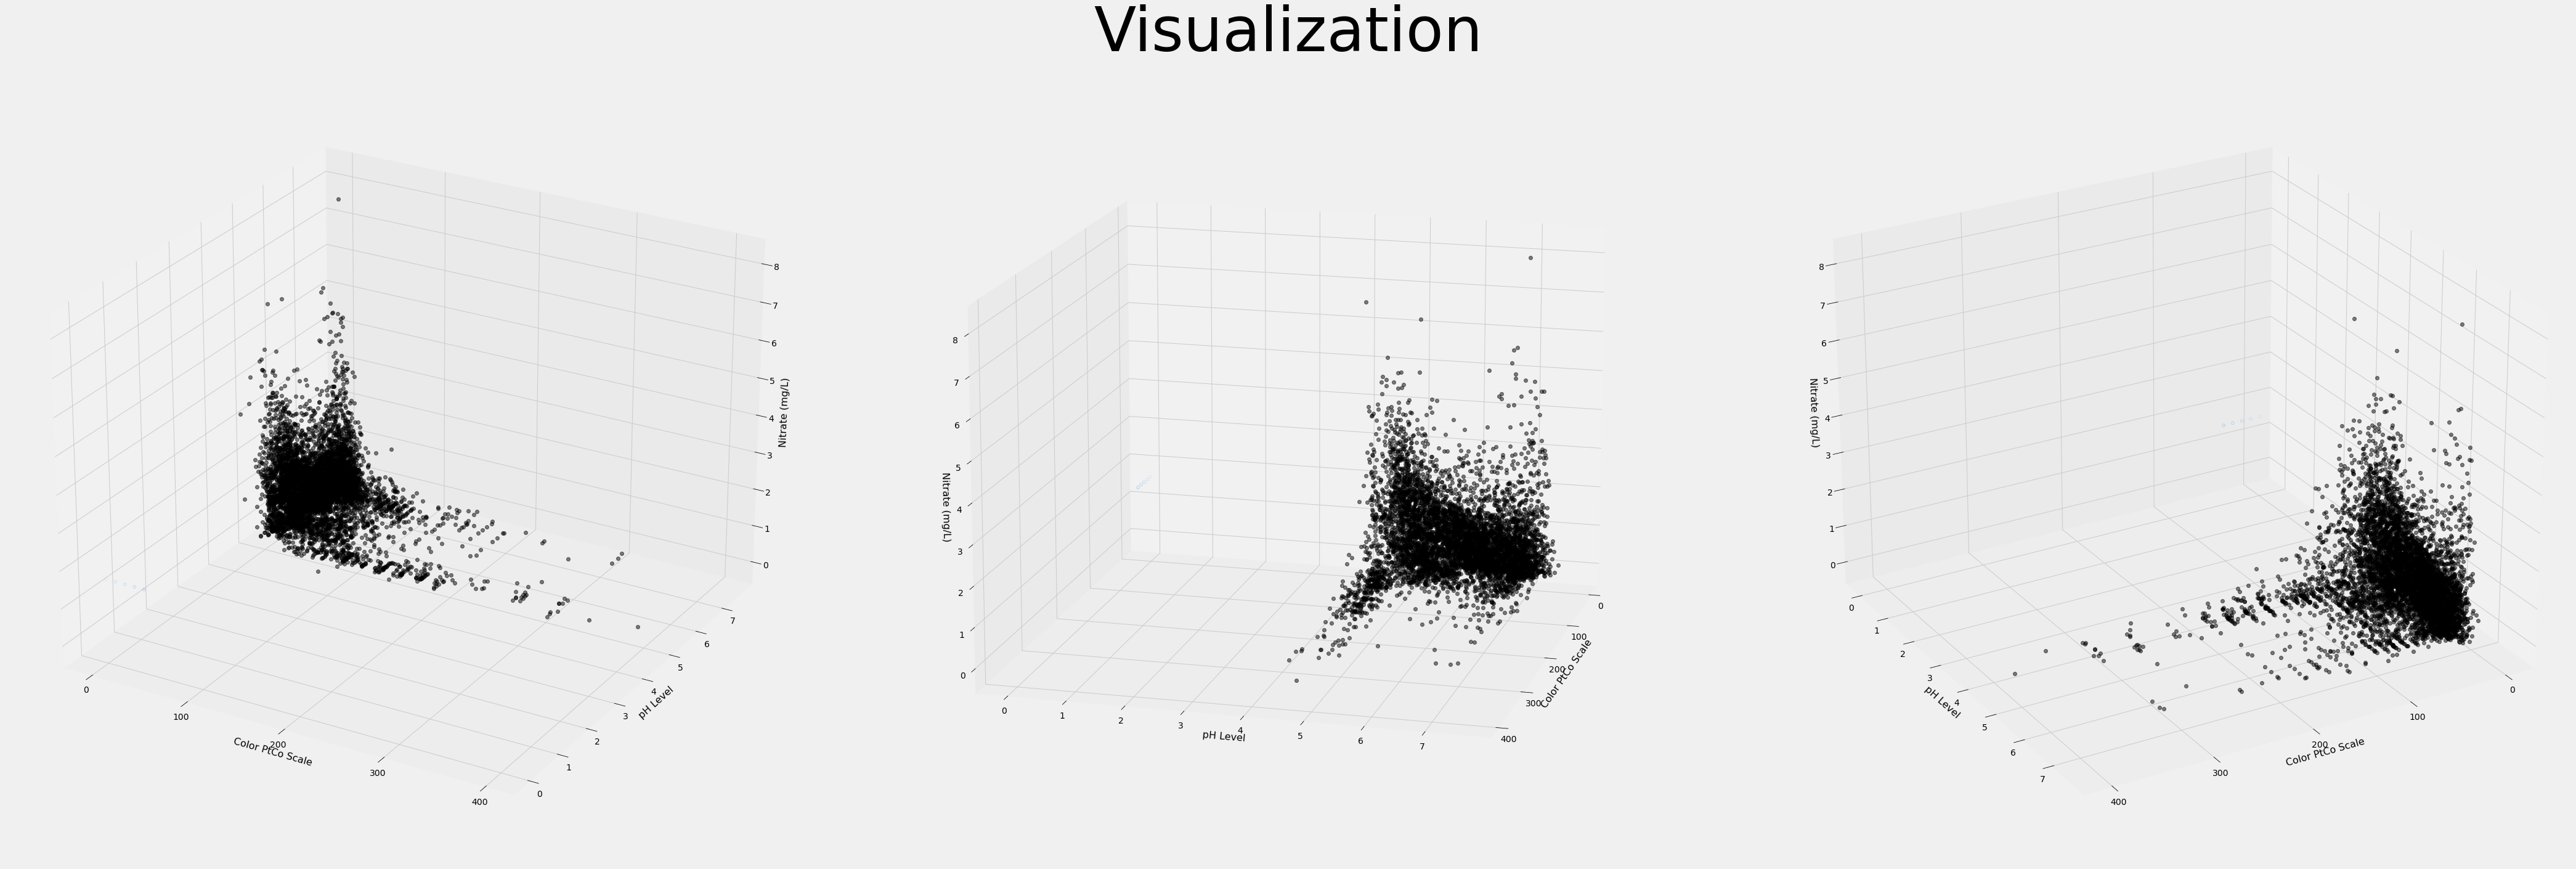

In [190]:
# Visualization

# Prepare data 
Xv = df[['color_ptCo', 'pH']].values.reshape(-1,2)
yv = df['NO3_minus']


# Create range for each dimension
x = Xv[:, 0]
y = Xv[:, 1]
z = yv

xx_pred = np.linspace(0.0, 40.0, 5)
yy_pred = np.linspace(0.0, 15, 1)
xx_pred, yy_pred = np.meshgrid(xx_pred, yy_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

# Predict trend using rf model 
predicted = rf.predict(model_viz)

# Plot model 
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(60, 20))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes: 
    ax.plot(x, y, z, color = 'k', zorder=15, linestyle='none', marker = 'o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Color PtCo Scale', fontsize=16)
    ax.set_ylabel('pH Level', fontsize=16)
    ax.set_zlabel('Nitrate (mg/L)', fontsize=16)
    ax.locator_params(nbins=4, axis= 'x')
    ax.locator_params(nbins=5, axis='x')
    
ax1.view_init(elev=25, azim=-60)
ax2.view_init(elev=15, azim=15)
ax3.view_init(elev=25, azim=60)

fig.suptitle('Visualization', fontsize=100, color='k')

fig.tight_layout() 


